In [73]:
import pandas as pd
import seaborn as sns

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing

In [75]:
data=pd.read_csv(r'C:\Users\Asus\MLProject\Insurance_Dataset.csv')

In [76]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [78]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [79]:
data.isnull().sum().sum()#data set having 0 null value

0

In [80]:
data.shape

(1338, 7)

In [81]:
data.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
le=LabelEncoder()

In [84]:
gen=le.fit_transform(data['sex'])

In [85]:
data['gender']=gen

In [86]:
som=le.fit_transform(data['smoker'])

In [87]:
data['smoke']=som

In [88]:
reg=le.fit_transform(data['region'])

In [89]:
data['location']=reg

In [90]:
data['age'].mean()

39.20702541106129

In [91]:
data['age'].isna().sum()

0

In [92]:
data['sex'].count()

1338

In [93]:
print(set(gen))
print(set(som))
print(set(reg))


{0, 1}
{0, 1}
{0, 1, 2, 3}


In [94]:
data.drop(['sex','smoker','region'],axis=1,inplace=True)

In [95]:
data

,age,bmi,children,charges,gender,smoke,location
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


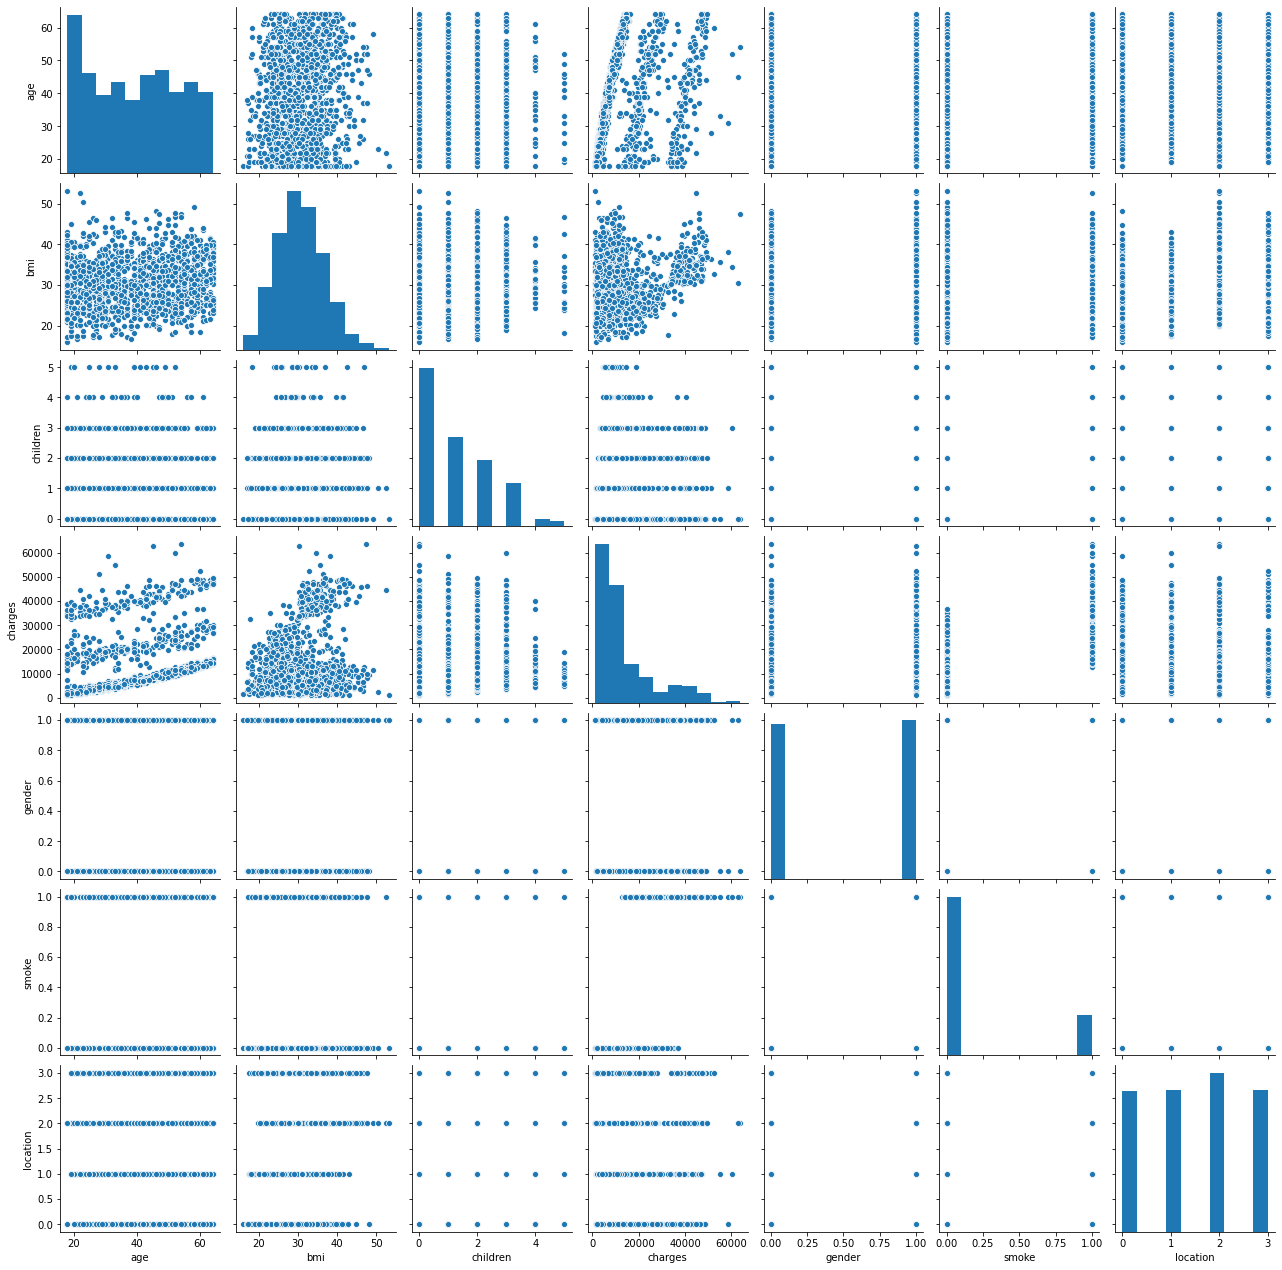

In [96]:
sns.pairplot(data)

In [97]:
cols=data.columns

In [98]:
cols

Index(['age', 'bmi', 'children', 'charges', 'gender', 'smoke', 'location'], dtype='object')

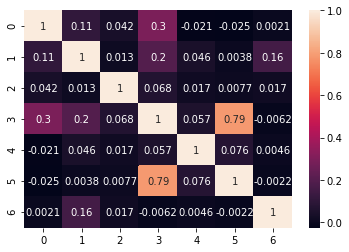

In [99]:
corr_mat=np.corrcoef(data[cols].values.T)
hm=sns.heatmap(corr_mat, annot=True)
plt.show()

In [100]:
corr_mat

array([[ 1.        ,  0.10927188,  0.042469  ,  0.29900819, -0.02085587,
        -0.02501875,  0.00212731],
       [ 0.10927188,  1.        ,  0.0127589 ,  0.19834097,  0.04637115,
         0.00375043,  0.15756585],
       [ 0.042469  ,  0.0127589 ,  1.        ,  0.06799823,  0.01716298,
         0.00767312,  0.01656945],
       [ 0.29900819,  0.19834097,  0.06799823,  1.        ,  0.05729206,
         0.78725143, -0.00620823],
       [-0.02085587,  0.04637115,  0.01716298,  0.05729206,  1.        ,
         0.07618482,  0.00458839],
       [-0.02501875,  0.00375043,  0.00767312,  0.78725143,  0.07618482,
         1.        , -0.00218068],
       [ 0.00212731,  0.15756585,  0.01656945, -0.00620823,  0.00458839,
        -0.00218068,  1.        ]])

In [101]:
y=data['charges']
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [102]:
x=data.drop(['charges'],axis=1)

In [103]:
x

,age,bmi,children,gender,smoke,location
0,19,27.900,0,0,1,3
1,18,33.770,1,1,0,2
2,28,33.000,3,1,0,2
3,33,22.705,0,1,0,1
4,32,28.880,0,1,0,1
...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1
1334,18,31.920,0,0,0,0
1335,18,36.850,0,0,0,2
1336,21,25.800,0,0,0,3


# Splitting of data set

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [106]:
x_train

,age,bmi,children,gender,smoke,location
620,30,31.400,1,1,0,3
831,36,25.840,0,0,0,1
1115,55,32.670,1,1,0,2
1008,25,24.985,2,1,0,0
1248,18,39.820,0,0,0,2
...,...,...,...,...,...,...
1311,33,26.695,0,0,0,1
1255,42,37.900,0,0,0,3
278,59,31.790,2,1,0,2
816,24,24.225,0,0,0,1


In [107]:
y_test

676     12485.80090
30      35585.57600
579      3206.49135
899      2117.33885
1106     8988.15875
           ...     
363      2597.77900
819     55135.40209
901     48673.55880
1334     2205.98080
747      1627.28245
Name: charges, Length: 402, dtype: float64

In [108]:
y_train

620      3659.34600
831      5266.36560
1115    10807.48630
1008    23241.47453
1248     1633.96180
           ...     
1311     4571.41305
1255     6474.01300
278     12928.79110
816      2842.76075
1124    40904.19950
Name: charges, Length: 936, dtype: float64

# Linear regression

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lr=LinearRegression()

In [111]:
lr.fit(x_train,y_train)

LinearRegression()

In [112]:
y_predict=lr.predict(x_test)

In [113]:
y_predict

array([17026.95398479, 28263.98650723,  2414.1320442 ,    83.0115854 ,
       10365.07927685,  4240.40048005,  5235.22576387, 10029.68083646,
       11581.76522696, 34277.37788609, 14336.72447165,  3090.77376974,
        5348.50742055,  2966.43580964, 17731.83063499, 12739.23983038,
        8625.4244824 ,  5381.77227801,  1259.80589215,  1497.071528  ,
       14318.31090466,  3897.92196237,  7567.77527206,  5014.5250821 ,
        6092.05664412,  3488.80351347,  1471.4254855 ,  5652.51116967,
        7675.67112164,  2963.6863426 ,  1988.26542581,  9166.70155024,
       12599.85882218, 30845.50447624,  1828.76859666, 11136.89024642,
        3814.87233651, 13268.45280471, 11333.06626954,  5358.02153348,
       39140.35114045, 15539.75095911,  7668.59595689,  2297.16043165,
       12417.65477454, 11531.87582265,  8486.47368863, 27405.797468  ,
         643.83778676,  2878.22899866,  7761.53302679, 12497.71130907,
       27341.92196288,  5846.42782764, 11792.33232502,  9970.83316167,
      

In [114]:
train_pred=lr.predict(x_train)

In [115]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [116]:
print("Training error of linear: ", mean_squared_error(y_train, train_pred))
print("Testing error of linear: ", mean_squared_error(y_test, y_predict))

Training error of linear:  37633644.79034822
Testing error of linear:  34142409.375337556


In [117]:
print("Training accuracy of linear: ",r2_score(y_train, train_pred))
print("Testing accuracy of linear: ",r2_score(y_test, y_predict ))
print("accuracy:",lr.score(x_test,y_test))

Training accuracy of linear:  0.7465857932974674
Testing accuracy of linear:  0.7594978018682261
accuracy: 0.7594978018682261


# Decision tree

In [118]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [119]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [120]:
train_pred_dtr=dtr.predict(x_train)
test_pred_dtr=dtr.predict(x_test)

In [121]:
print("Training error of decision tree: ", mean_squared_error(y_train, train_pred_dtr))
print("Testing error of decision tree: ", mean_squared_error(y_test, test_pred_dtr))

Training error of decision tree:  195722.34569883143
Testing error of decision tree:  52253481.83415826


In [122]:
print("Training accuracy of decision tree: ",r2_score(y_train, train_pred_dtr))
print("Testing accuracy of decision tree: ",r2_score(y_test, test_pred_dtr))

Training accuracy of decision tree:  0.9986820616699356
Testing accuracy of decision tree:  0.6319217808268831


# Support vector machine  

In [123]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train, y_train)

SVR()

In [124]:
train_pred_svr=svr.predict(x_train)
test_pred_svr=svr.predict(x_test)

In [125]:
print("Training error of svr: ", mean_squared_error(y_train, train_pred_svr))
print("Testing error of svr: ", mean_squared_error(y_test, test_pred_svr))

Training error of svr:  164003267.76985055
Testing error of svr:  158358907.41096494


In [126]:
print("Training accuracy of svr: ",r2_score(y_train, train_pred_svr))
print("Testing accuracy of svr: ",r2_score(y_test, test_pred_svr))

Training accuracy of svr:  -0.10435112596850193
Testing accuracy of svr:  -0.11549436676820912


# Random forest regression

In [127]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [128]:
train_pred_rfr=svr.predict(x_train)
test_pred_rfr=svr.predict(x_test)

In [129]:
print("Training error of random forest: ", mean_squared_error(y_train, train_pred_rfr))
print("Testing error of random forest: ", mean_squared_error(y_test, test_pred_rfr))

Training error of random forest:  164003267.76985055
Testing error of random forest:  158358907.41096494


In [130]:
print("Training accuracy of random forest: ",r2_score(y_train, train_pred_rfr))
print("Testing accuracy of random forest: ",r2_score(y_test, test_pred_rfr))

Training accuracy of random forest:  -0.10435112596850193
Testing accuracy of random forest:  -0.11549436676820912


# Pipeline

In [131]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)

In [132]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [134]:
p1=Pipeline([('sc1',StandardScaler()),('pca1',PCA()),('lr1',LinearRegression())])

In [135]:
p1.fit(x_train,y_train)

Pipeline(steps=[('sc1', StandardScaler()), ('pca1', PCA()),
                ('lr1', LinearRegression())])

In [136]:
train_pred_p1=p1.predict(x_train)
test_pred_p1=p1.predict(x_test)

In [137]:
print("Training accuracy of linear: ",r2_score(y_train, train_pred_p1))
print("Testing accuracy of linear: ",r2_score(y_test, test_pred_p1 ))

Training accuracy of linear:  0.7465857932974674
Testing accuracy of linear:  0.7594978018682261


# Using of model selection

In [138]:
x_train_x,x_test,y_train_y,y_test=train_test_split(x_train,y_train,test_size=0.3)

In [139]:
mod_pred=lr.predict(x_train_x)

In [140]:
print("Training accuracy of linear: ",r2_score(y_train_y, mod_pred))


Training accuracy of linear:  0.7710275150043642
